# <center> Идентификация пользователей по посещенным веб-страницам
<img src='http://i.istockimg.com/file_thumbview_approve/21546327/5/stock-illustration-21546327-identification-de-l-utilisateur.jpg'>

# <center>Неделя 2. Подготовка и первичный анализ данных

На второй неделе мы продолжим подготовливать данные для дальнейшего анализа и построения прогнозных моделей. Конкретно, раньше мы определили что сессия – это последовательность из 10 посещенных пользователем сайтов, теперь сделаем длину сессии параметром, и потом при обучении прогнозных моделей выберем лучшую длину сессии.
Также мы познакомимся с предобработанными данными и статистически проверим первые гипотезы, связанные с нашими наблюдениями. 

**План 2 недели:**
 - Часть 1. Подготовка нескольких обучающих выборок для сравнения
 - Часть 2. Первичный анализ данных, проверка гипотез

**В этой части проекта Вам могут быть полезны  следующие видеозаписи лекций курса "Построение выводов по данным":**

   - [Доверительные интервалы для доли](https://www.coursera.org/learn/stats-for-data-analysis/lecture/3oi53/dovieritiel-nyie-intiervaly-dlia-doli)
   - [Биномиальный критерий для доли](https://www.coursera.org/learn/stats-for-data-analysis/lecture/JwmBw/binomial-nyi-kritierii-dlia-doli)
   - [Доверительные интервалы на основе бутстрепа](https://www.coursera.org/learn/stats-for-data-analysis/lecture/GZjW7/dovieritiel-nyie-intiervaly-na-osnovie-butstriepa)
   
**Кроме того, в задании будут использоваться библиотеки Python [glob](https://docs.python.org/3/library/glob.html), [pickle](https://docs.python.org/2/library/pickle.html), [itertools](https://docs.python.org/3/library/itertools.html) и класс [csr_matrix](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.html) из scipy.sparse.**

## Часть 1. Подготовка нескольких обучающих выборок для сравнения

Пока мы брали последовательности из 10 сайтов, и это было наобум. Давайте сделаем число сайтов в сессии параметром, чтоб в дальнейшем сравнить модели классификации, обученные на разных выборках – с 5, 7, 10 и 15 сайтами в сессии. Более того, пока мы брали по 10 сайтов подряд, без пересечения. Теперь давайте применим идею скользящего окна – сессии теперь будут перекрываться. 

**Пример**: для длины сессии 10 и ширины окна 7 файл из 30 записей породит не 3 сессии, как раньше (1-10, 11-20, 21-30), а 5 (1-10, 8-17, 15-24, 22-30, 29-30). При этом в предпоследней сессии будет один ноль, а в последней – 8 нолей.

Создадим неколько выборок для разных сочетаний параметров длины сессии и ширины окна. Все они представлены в табличке ниже:

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
</style>
<table class="tg">
  <tr>
    <th class="tg-031e">session_length -&gt;<br>window_size <br></th>
    <th class="tg-031e">5</th>
    <th class="tg-031e">7</th>
    <th class="tg-031e">10</th>
    <th class="tg-031e">15</th>
  </tr>
  <tr>
    <td class="tg-031e">5</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
  </tr>
  <tr>
    <td class="tg-031e">7</td>
    <td class="tg-031e"></td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
  </tr>
  <tr>
    <td class="tg-031e">10</td>
    <td class="tg-031e"></td>
    <td class="tg-031e"></td>
    <td class="tg-031e"><font color='green'>v</font></td>
    <td class="tg-031e">v</td>
  </tr>
</table>

Итого должно получиться 18 разреженных матриц – указанные в таблице 9 сочетаний параметров формирования сессий для выборок из 10 и 150 пользователей. При этом 2 выборки мы уже сделали в прошлой части, они соответствуют сочетанию параметров: session_length=10, window_size=10, которые помечены в таблице выше галочкой зеленого цвета (done).

Реализуйте функцию *prepare_sparse_train_set_window*.

Аргументы:
- *csv_files_mask* – путь к каталогу с csv-файлами
- *site_freq_path* – путь к pickle-файлу с частотным словарем, полученным в 1 части проекта
- *session_length* – длина сессии (параметр)
- *window_size* – ширина окна (параметр) 

Функция должна возвращать 2 объекта:
- разреженную матрицу *X_sparse* (двухмерная Scipy.sparse.csr_matrix), в которой строки соответствуют сессиям из *session_length* сайтов, а *max(site_id)* столбцов – количеству посещений *site_id* в сессии. 
- вектор *y* (Numpy array) "ответов" в виде ID пользователей, которым принадлежат сессии из *X_sparse*

Детали:
- Модифицируйте созданную в 1 части функцию *prepare_train_set*
- Сессии должны быть уникальными, можно использовать pandas.DataFrame.drop_duplicates
- Замеряйте время выполнения итераций цикла с помощью *time* из *time* (или с помощью виджета [log_progress](https://github.com/alexanderkuk/log-progress), [статья](https://habrahabr.ru/post/276725/) о нем на Хабрахабре)
- 150 файлов из *capstone_websites_data/150users/* должны обрабатываться за несколько секунд (в зависимости от входных параметров). Если дольше – не страшно, но знайте, что функцию можно ускорить. 

In [1]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
from glob import glob
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
import pickle
from scipy import stats as sts
from statsmodels.stats.proportion import proportion_confint
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from time import time
def add_elem_to_dict(dictionary, element):
    global dict_add_time
    s_time = time()
    if element in dictionary:
        dictionary[element][1] += 1
    else:
        dictionary[element] = [len(dictionary.keys())+1, 1]
    dict_add_time += time() - s_time

In [3]:
def prepare_train_set_window(csv_files_mask, site_freq_path, session_length=5, window_width = 3):
    # Получаем список файлов, удовлетворяющих заданной маске
    list_of_files = glob(csv_files_mask)
    data = []
    with open(site_freq_path, "r") as fp:
        site_dict = pickle.load(fp)
    for path in list_of_files:
        all_sites_from_file = []
        # Читаем файлы из списка
        with open(path, 'r') as fp:
            list_of_sites = []
            for line in fp:
                # Читаем строки из файла, каждую строку разбиваем на части
                list_of_tokens = line.strip().split(',')
                # Проверяем, что строка не пустая
                if len(list_of_tokens) != 3:
                    break
                # Добавляем элемент в словарь
                all_sites_from_file.append(site_dict[list_of_tokens[2]][0])
                user_id = int(list_of_tokens[0])
        n = len(all_sites_from_file)
        ind = 0
        while True:
            if ind + session_length > n-1:
                data.append(all_sites_from_file[ind:n] + [0 for _ in range(session_length - n + ind)] + [user_id])
            else:
                data.append(all_sites_from_file[ind:ind+session_length] + [user_id])
            ind += window_width
            if ind >= n:
                break
    df = pd.DataFrame(data,columns = ['site'+str(x) for x in range(1, session_length+1)] + ['target'])
    return df.drop_duplicates()

In [5]:
dataFrame = prepare_train_set_window('capstone_websites_data/3users_toy/*', 
                                     'capstone_websites_data/site_freq_3users.pkl', 
                                     session_length=5, window_width = 3)
dataFrame

,site1,site2,site3,site4,site5,target
0,1,2,2,3,2,1
1,3,2,4,5,6,1
2,5,6,7,8,1,1
3,8,1,4,4,4,1
4,4,4,0,0,0,1
5,1,2,9,9,2,2
6,9,2,0,0,0,2
7,10,4,2,4,2,3
8,4,2,4,4,6,3
9,4,6,11,10,10,3


In [5]:
def make_sparse_data(data):
    indptr = [0]
    indices = []
    sparse_data = []
    for row in data:
        val, cnt = np.unique(row[row != 0], return_counts=True)
        indptr.append(indptr[-1] + len(val))
        for v, c in zip(val, cnt):
            indices.append(v - 1)
            sparse_data.append(c)
    return np.uint64(sparse_data),  np.uint64(indices), np.uint64(indptr)

In [6]:
def prepare_sparse_train_set_window(csv_files_mask, site_freq_path, 
                                    session_length=10, window_size=10):
    data = prepare_train_set_window(csv_files_mask, 
                                    site_freq_path, 
                                    session_length=session_length, 
                                    window_width = window_size)
    X, y = data.iloc[:, :-1].values, data.iloc[:, -1].values
    X_sparse = csr_matrix(make_sparse_data(X)) 
    return X_sparse, y

**Примените полученную функцию с параметрами *session_length=5* и *window_size=3* к игрушечному примеру. Убедитесь, что все работает как надо.**

In [12]:
t_start = time()
X_toy_s5_w3, y_s5_w3 = prepare_sparse_train_set_window('capstone_websites_data/3users_toy/*', 
                                                       'capstone_websites_data/site_freq_3users.pkl',
                                                       session_length=15, window_size=5)
print("Time elapsed: %lf" % (time() - t_start))

Time elapsed: 0.006000


In [13]:
X_toy_s5_w3.todense()

matrix([[2, 3, 1, 4, 1, 1, 1, 1, 0, 0, 0],
        [1, 0, 0, 4, 1, 1, 1, 1, 0, 0, 0],
        [1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0],
        [1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0],
        [0, 3, 0, 5, 0, 1, 0, 0, 0, 3, 1],
        [0, 1, 0, 3, 0, 1, 0, 0, 0, 2, 1],
        [0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0]], dtype=uint64)

In [9]:
X_toy_s5_w3.todense()

matrix([[1, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0],
        [1, 0, 0, 3, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0],
        [1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0],
        [0, 1, 0, 3, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 1, 0, 0, 0, 2, 1],
        [0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=uint64)

**Запустите созданную функцию 16 раз с помощью циклов по числу пользователей num_users (10 или 150), значениям параметра *session_length* (15, 10, 7 или 5) и значениям параметра *window_size* (10, 7 или 5). Сериализуйте все 16 разреженных матриц (обучающие выборки) и векторов (метки целевого класса – ID пользователя) в файлы 'capstone_websites_data/X\_sparse_{num_users}users_s{session_length}_w{window_size}.pkl' и 'capstone\_websites\_data/y\_{num_users}users_s{session_length}_w{window_size}.pkl'.**

**Чтоб убедиться, что мы все далее будем работать с идентичными объектами, запишите в список *data_lengths* число строк во всех полученных рареженных матрицах (16 значений). Если какие-то будут совпадать, это нормально (можно сообразить, почему).**

**На моем ноутбуке этот участок кода отработал за 45 секунд, хотя понятно, что все зависит от эффективности реализации функции *prepare_sparse_train_set_window* и мощности используемого железа. И честно говоря, моя первая реализация была намного менее эффективной (34 минуты), так что тут у Вас есть возможность оптимизировать свой код.**

In [10]:
#%%time
import itertools

t_start = time()

data_lengths = []

for num_users in [10, 150]:
    for window_size, session_length in itertools.product([10, 7, 5], [15, 10, 7, 5]):
        if window_size <= session_length and (window_size, session_length) != (10, 10):
            X_sparse, y = prepare_sparse_train_set_window('capstone_websites_data/%dusers/*' % num_users, 
                                                          'capstone_websites_data/site_freq_%dusers.pkl' % num_users,
                                                           session_length=session_length, 
                                                           window_size=window_size)
            data_lengths.append(X_sparse.shape[0])
            file_name = 'capstone_websites_data/X_sparse_%dusers_s%d_w%d.pkl' % (num_users, session_length, window_size) 
            with open(file_name, 'wb') as fp:
                pickle.dump(X_sparse, fp)
            file_name = 'capstone_websites_data/y_%dusers_s%d_w%d.pkl' % (num_users, session_length, window_size)
            with open(file_name,'wb') as fp:
                pickle.dump(y, fp)
print("Time elapse: %lf" % (time() - t_start))

Time elapse: 92.699000


In [11]:
data_lengths

[13554,
 19297,
 18490,
 17611,
 26889,
 25683,
 24376,
 22539,
 132629,
 189138,
 186063,
 181281,
 264261,
 259440,
 251786,
 237928]

**Запишите в файл *answer2_1.txt* все числа из списка *data_lengths* через пробел. Полученный файл будет ответом на 1 вопрос теста.**

In [11]:
def write_answer_to_file(answer, file_address):
    with open(file_address, 'w') as out_f:
        out_f.write(str(answer))

In [12]:
write_answer_to_file(" ".join(map(str, data_lengths)), 
                     'answer2_1.txt')

## Часть 2. Первичный анализ данных, проверка гипотез

**Считаем в DataFrame подготовленный на 1 неделе файл train_data_10users.csv. Далее будем работать с ним.**

In [13]:
train_df = pd.read_csv('capstone_websites_data/train_data_10users.csv', 
                       index_col='session_id')

In [14]:
train_df.head()

,site1,site2,site3,site4,site5,site6,site7,site8,site9,site10,target
session_id,,,,,,,,,,,
0,1,2,2,3,4,5,6,7,8,7,31
1,7,8,7,7,9,10,11,12,13,14,31
2,7,15,16,17,17,8,17,17,10,3,31
3,18,19,20,17,21,17,17,17,17,22,31
4,23,24,25,17,26,27,28,29,30,31,31


In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13084 entries, 0 to 14060
Data columns (total 11 columns):
site1     13084 non-null int64
site2     13084 non-null int64
site3     13084 non-null int64
site4     13084 non-null int64
site5     13084 non-null int64
site6     13084 non-null int64
site7     13084 non-null int64
site8     13084 non-null int64
site9     13084 non-null int64
site10    13084 non-null int64
target    13084 non-null int64
dtypes: int64(11)
memory usage: 1.2 MB


**Распределение целевого класса:**

In [16]:
train_df['target'].value_counts()

128    2340
39     1964
207    1853
127    1652
237    1612
33      993
31      751
50      747
100     649
241     523
Name: target, dtype: int64

**Посчитаем распределение числа уникальных сайтов в каждой сессии из 10 посещенных подряд сайтов.**

In [17]:
num_unique_sites = [np.unique(train_df.values[i, :-1]).shape[0] 
                    for i in range(train_df.shape[0])]

In [18]:
pd.Series(num_unique_sites).value_counts()

7     2244
6     2242
5     1870
8     1768
4     1289
9     1101
3     1067
2      993
10     427
1       83
dtype: int64

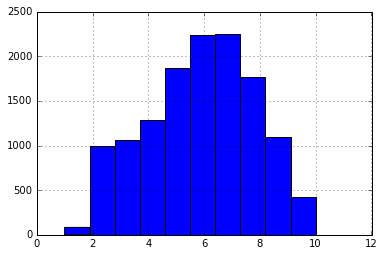

In [19]:
pd.Series(num_unique_sites).hist();

**Проверьте с помощью QQ-плота и критерия Шапиро-Уилка, что эта величина распределена нормально. Сделайте вывод. Ответ на второй вопрос в тесте будет файл со словом "YES" или "NO" в зависимости от того, распределено ли нормально число уникальных сайтов в сессии.**

((array([-3.87654413, -3.65500479, -3.53354173, ...,  3.53354173,
          3.65500479,  3.87654413]),
  array([ 1,  1,  1, ..., 10, 10, 10], dtype=int64)),
 (2.1107610070476022, 5.9048456129623963, 0.9810704566042957))

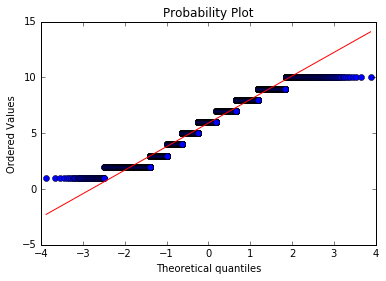

In [20]:
fig, ax = plt.subplots()
sts.probplot(num_unique_sites, plot=ax)

In [21]:
W, p_val = sts.shapiro(num_unique_sites)
print("p-value for Shapiro-Wilk test: %lf" % p_val)

p-value for Shapiro-Wilk test: 0.000000


In [22]:
write_answer_to_file("NO", 
                     'answer2_2.txt')

**Проверьте гипотезу о том, что пользователь хотя бы раз зайдет на сайт, который он уже ранее посетил в сессии из 10 сайтов. Конкретно, проверьте с помощью биномиального критерия для доли, что доля случаев, когда пользователь повторно посетил какой-то сайт (то есть число уникальных сайтов в сессии < 10) велика: больше 95% (обратите внимание, что альтернатива тому, что доля равна 95% –  одностороняя). Ответом на 3 вопрос в тесте будет порядок полученного p-value (например, если p=2.3e-4, то ответ будет -4).**

In [23]:
has_two_similar = (np.array(num_unique_sites) < 10).astype('int')

In [24]:
has_two_similar.sum()

12657

In [25]:
sts.binom_test(has_two_similar.sum(), has_two_similar.shape[0], p=0.95)/2

2.0160413069477899e-22

In [26]:
write_answer_to_file('-22', 
                     'answer2_3.txt')

**Постройте для этой доли 95% доверительный интервал Уилсона. Округлите границы интервала до 3 знаков после запятой и запишите через пробел в файл *answer2_4.txt*. Это будет ответов на 4 вопрос теста.**

In [27]:
wilson_interval = proportion_confint(has_two_similar.sum(), has_two_similar.shape[0], method='wilson')
wilson_interval

(0.96418039542443412, 0.97027468935636896)

In [28]:
write_answer_to_file('{} {}'.format(round(wilson_interval[0], 3),
                                   round(wilson_interval[1], 3)), 
                     'answer2_4.txt')

**Постройте распределение частоты посещения сайтов (сколько раз тот или иной сайт попадается в выборке) для сайтов, которые были посещены как минимум 1000 раз.**

In [29]:
with open('capstone_websites_data/site_freq_10users.pkl', "r") as fp:
        site_dict = pickle.load(fp)
key_to_delete = []
for key in site_dict:
    freq = site_dict[key][1]
    if freq < 1000:
        key_to_delete.append(key)
    else:
        site_dict[key] = site_dict[key][1]
for key in key_to_delete:
    site_dict.pop(key, None)
site_dict

{'accounts.google.com': 2068,
 'accounts.youtube.com': 1033,
 'apis.google.com': 3747,
 'clients1.google.com': 1491,
 'clients6.google.com': 1039,
 'fr-mg42.mail.yahoo.com': 1682,
 'i1.ytimg.com': 1230,
 'mail.google.com': 4063,
 'platform.twitter.com': 1040,
 'plus.google.com': 2610,
 'r1---sn-gxo5uxg-jqbe.googlevideo.com': 2020,
 'r2---sn-gxo5uxg-jqbe.googlevideo.com': 1579,
 'r3---sn-gxo5uxg-jqbe.googlevideo.com': 1858,
 'r4---sn-gxo5uxg-jqbe.googlevideo.com': 1487,
 's-static.ak.facebook.com': 1379,
 's.youtube.com': 6227,
 'safebrowsing-cache.google.com': 1032,
 'static.ak.facebook.com': 1259,
 'twitter.com': 1196,
 'www.facebook.com': 4037,
 'www.google.com': 5048,
 'www.google.fr': 7803,
 'www.youtube.com': 1799}

In [30]:
site_freqs = site_dict.values()
site_freqs[:5]

[1259, 1858, 2068, 1032, 4037]

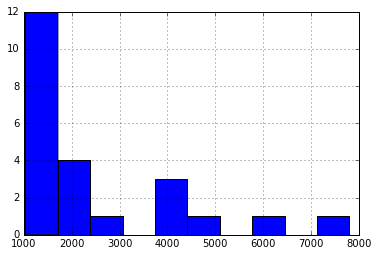

In [31]:
pd.Series(site_freqs).hist();

**Постройте 95% доверительный интервал для средней частоты появления сайта в выборке (во всей, уже не только для тех сайтов, что были посещены как минимум 1000 раз) на основе bootstrap. Используйте столько же bootstrap-подвыборок, сколько сайтов оказалось в исходной выборке по 10 пользователям. Берите подвыборки из посчитанного списка частот посещений сайтов – не надо заново считать эти частоты. Учтите, что частоту появления нуля (сайт с индексом 0 появлялся там, где сессии были короче 10 сайтов) включать не надо. Округлите границы интервала до 3 знаков после запятой и запишите через пробел в файл *answer2_5.txt*. Это будет ответом на 5 вопрос теста.**

In [32]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

In [33]:
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [34]:
def add_elem_to_dict(dictionary, element):
    global dict_add_time
    s_time = time()
    if element in dictionary:
        dictionary[element][1] += 1
    else:
        dictionary[element] = [len(dictionary.keys())+1, 1]
    dict_add_time += time() - s_time
new_dict = {}


In [35]:
with open('capstone_websites_data/site_freq_10users.pkl', "r") as fp:
        site_dict = pickle.load(fp)
key_to_delete = []
for key in site_dict:
    freq = site_dict[key][1]
    site_dict[key] = site_dict[key][1]
num_of_sites = len(site_dict)
num_of_sites

4913

In [36]:
site_freqs = site_dict.values()
site_freqs[:5]

[1, 2, 2, 40, 3]

In [39]:
boot_data = get_bootstrap_samples(np.array(site_freqs), 4913)
mean_data = map(np.mean, boot_data)
left, right = stat_intervals(mean_data, 0.05)
left, right

(21.123061266028902, 32.926195807042532)

In [40]:
write_answer_to_file('{} {}'.format(round(right ,3), round(left ,3)), 
                                    'answer2_5.txt')

## Пути улучшения
В этом проекте свобода творчества на каждом шаге, а 7 неделя проекта посвящена общему описанию (.ipynb или pdf) и взаимному оцениванию проектов. Что еще можно добавить по второй части проекта:
- можно дополнительно рассматривать сессии с параметром – длиной сессии по времени. И составить выборки, скажем, для 5-, 10-, 15- и 20-минутных сессий (это как раз пригодится в [соревновании](https://inclass.kaggle.com/c/identify-me-if-you-can-yandex-mipt) Kaggle Inclass)
- можно провести больше первичного анализа и проверять прочие интересные гипотезы (а больше их появится после создания признаков на следующей неделе)

На 3 неделе мы займемся визуальным анализом данных и построением признаков.